In [ ]:
import matplotlib.pylab as plt 
import numpy as np 
import keras
import time
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
!nvidia-smi

Tue Jan  3 07:34:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Train Model on CPU

In [ ]:
tf.config.set_visible_devices([], 'GPU')

# Fashion MNIST Load Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
assert x_train.shape==(60000,28,28)
assert x_test.shape==(10000,28,28)
assert y_train.shape==(60000,)
assert y_test.shape==(10000,)

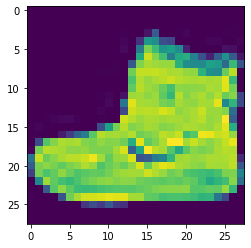

In [ ]:
plt.imshow(x_train[0])

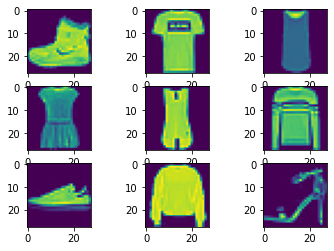

In [ ]:
for i in range(9):
    pyplot.subplot(330+1+ i)
    pyplot.imshow(x_train[i])
pyplot.show()

# Preprocessing

In [ ]:
# Reshape the training data into a form which can be easily 
# identified by the cnn model as corresponding to greyscale images.
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# reshape the y training and test data and use one hot encoding 
y_train=y_train.reshape(60000,1)
y_test=y_test.reshape(10000,1)
print(y_train.shape)
print(y_test.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(60000, 1)
(10000, 1)


# Model

In [ ]:
model = Sequential()

model.add(Conv2D(64,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(28,28,1),
                 name='conv_1'))

model.add(MaxPooling2D(pool_size=(2,2),
                       name='max_pool_1'))

model.add(Conv2D(32,
                 kernel_size=3,
                 activation='relu',
                 name='conv_2'))

model.add(MaxPooling2D(pool_size=(2,2),
                       name='max_pool_2'))

model.add(Flatten(name='flatten'))

model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 13, 13, 64)        0         
                                                                 
 conv_2 (Conv2D)             (None, 11, 11, 32)        18464     
                                                                 
 max_pool_2 (MaxPooling2D)   (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8010      
                                                                 
Total params: 27,114
Trainable params: 27,114
Non-traina

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## Training

In [ ]:
s = time.time()

history = model.fit(x_train, 
                  y_train, 
                  epochs=10,
                  batch_size=128)

e = time.time()

colab_time = e - s

print("Total Training time on Google Colab GPU = {}".format(colab_time))

Epoch 1/10
469/469 [==============================] - 64s 133ms/step - loss: 1.3442 - accuracy: 0.7390
Epoch 2/10
469/469 [==============================] - 58s 124ms/step - loss: 0.4698 - accuracy: 0.8317
Epoch 3/10
469/469 [==============================] - 57s 121ms/step - loss: 0.4070 - accuracy: 0.8533
Epoch 4/10
469/469 [==============================] - 58s 124ms/step - loss: 0.3712 - accuracy: 0.8645
Epoch 5/10
469/469 [==============================] - 57s 121ms/step - loss: 0.3435 - accuracy: 0.8751
Epoch 6/10
469/469 [==============================] - 56s 120ms/step - loss: 0.3272 - accuracy: 0.8796
Epoch 7/10
469/469 [==============================] - 57s 122ms/step - loss: 0.3132 - accuracy: 0.8849
Epoch 8/10
469/469 [==============================] - 56s 120ms/step - loss: 0.3010 - accuracy: 0.8898
Epoch 9/10
469/469 [==============================] - 56s 120ms/step - loss: 0.2930 - accuracy: 0.8931
Epoch 10/10
469/469 [==============================] - 57s 122ms/step - l

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Loss on running test : ', score[0])
print('Accuracy on running test : ', score[1])

Loss on running test :  0.34089693427085876
Accuracy on running test :  0.8791999816894531
